In [1]:
# All necessary imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
import pickle
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np

In [2]:
# Load training data and split labels and features (data)
data = pd.read_csv("./diabetes/training_data(no_pre-diabetes).csv")
labels = data["Diabetes_012"]
del data["Diabetes_012"] # deletes the labels from the data dataframe

In [3]:
# Split data in training and validation set, with for each a set of data and a set of corresponding labels
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, test_size=0.2, random_state=33)

In [4]:
"""Function to calculate and print all the necessary scores for a model
Negative is the non-diabetes class and Positive the diabetes class"""
def print_multiple_scores(validation_labels, prediction_model):
    # Determine the individual values of the confusion matrix
    tn, fp, fn, tp = confusion_matrix(validation_labels, prediction_model).ravel()

    # Calculate each individual score
    model_sens = tp / (tp + fn)
    model_spec = tn / (tn + fp)
    model_prec = tp / (tp + fp)
    model_fpr = fp / (tn + fp)
    model_npv = tn / (fn + tn)

    # Print all the scores for the user to see
    print("Sensitity (PPV): \t", model_sens)
    print("Specificity (TNR):  ", model_spec)
    print("Precision: \t\t\t", model_prec)
    print("False Positive Rate:", model_fpr)
    print("NPV: \t\t\t\t", model_npv)

In [5]:
# Max features
max_features = ["auto", 2, 4, 6, 8]

# criterion
criterion = ["gini", "entropy"]

# Number of trees in the random forest
n_estimators = [50, 100, 150, 200, 250, 500]

# Create random_grid
param_grid = {'max_features': max_features,
              'criterion': criterion,
              'n_estimators': n_estimators, }

In [6]:
recall_scorer = make_scorer(recall_score,  pos_label="2.0")

In [7]:
cv_score_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring="recall_macro", cv=5)

In [8]:
cv_score_model.fit(training_data, training_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 2, 4, 6, 8],
                         'n_estimators': [50, 100, 150, 200, 250, 500]},
             scoring='recall_macro')

In [9]:
# Print out the best parameters according to GridSearchCV
print("Best parameters: ", cv_score_model.best_params_)

# Determine accuracy of model based on validation set
pred_cv_score_model = cv_score_model.predict(validation_data)
print("Accuracy GridSearchCV model: ", accuracy_score(validation_labels, pred_cv_score_model))

Best parameters:  {'criterion': 'gini', 'max_features': 8, 'n_estimators': 500}
Accuracy GridSearchCV model:  0.8606358433464177


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


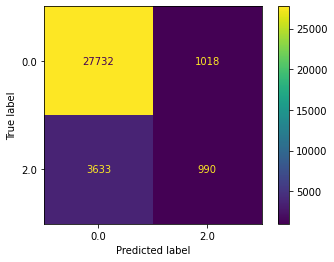

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


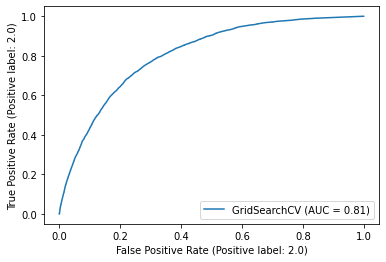

Sensitity (PPV): 	 0.21414665801427643
Specificity (TNR):   0.9645913043478261
Precision: 			 0.49302788844621515
False Positive Rate: 0.035408695652173916
NPV: 				 0.8841702534672405


In [10]:
# Plot confusion matrix
plot_confusion_matrix(cv_score_model, validation_data, validation_labels)
plt.show()
plot_roc_curve(cv_score_model, validation_data, validation_labels)
plt.show()
# Print all scores
print_multiple_scores(validation_labels, pred_cv_score_model)

In [11]:
# Pickle model
pickle.dump(cv_score_model, open("RF_cv_score_model.p", "wb"))